In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")
print("Before cleaning:", df.shape)
df.head()



Before cleaning: (1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [2]:
# Remove duplicate rows
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


After removing duplicates: (452, 7)


In [3]:
# Drop rows with missing values
df = df.dropna()
print("After removing missing values:", df.shape)


After removing missing values: (452, 7)


In [4]:
# Trim spaces from column names
df.columns = [c.strip() for c in df.columns]
print("Columns after cleaning:", list(df.columns))


Columns after cleaning: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']


In [5]:
# Standardize RiskLevel text values
if "RiskLevel" in df.columns:
    df["RiskLevel"] = (
        df["RiskLevel"]
        .astype(str)
        .str.lower()
        .str.replace("-", " ")
        .str.replace("_", " ")
        .str.strip()
    )
    print(df["RiskLevel"].value_counts())


RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64


In [6]:
# Convert numeric columns to proper data types
for col in ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop any rows with NaN after conversion
df = df.dropna()
print("After converting numeric columns:", df.shape)


After converting numeric columns: (452, 7)


In [7]:
# Check dataset shape, column types, and quick summary
print("Shape:", df.shape)
print("\nColumn Info:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Shape: (452, 7)

Column Info:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [8]:
# View basic statistics of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,452.0,29.194690,13.767379,10.0,19.0,25.0,35.0,70.0
SystolicBP,452.0,110.553097,17.872282,70.0,90.0,120.0,120.0,160.0
DiastolicBP,452.0,75.418142,13.754578,49.0,65.0,80.0,86.0,100.0
BS,452.0,8.346173,2.829209,6.0,6.9,7.5,7.9,19.0
BodyTemp,452.0,98.692478,1.410897,98.0,98.0,98.0,98.0,103.0
HeartRate,452.0,73.949115,8.156973,7.0,70.0,76.0,80.0,90.0


In [9]:
# Count how many samples per RiskLevel category
if "RiskLevel" in df.columns:
    print(df["RiskLevel"].value_counts())
else:
    print("No RiskLevel column found.")


RiskLevel
low risk     234
high risk    112
mid risk     106
Name: count, dtype: int64


In [10]:
# Compute correlations between numeric columns
corr = df.corr(numeric_only=True)
corr


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000


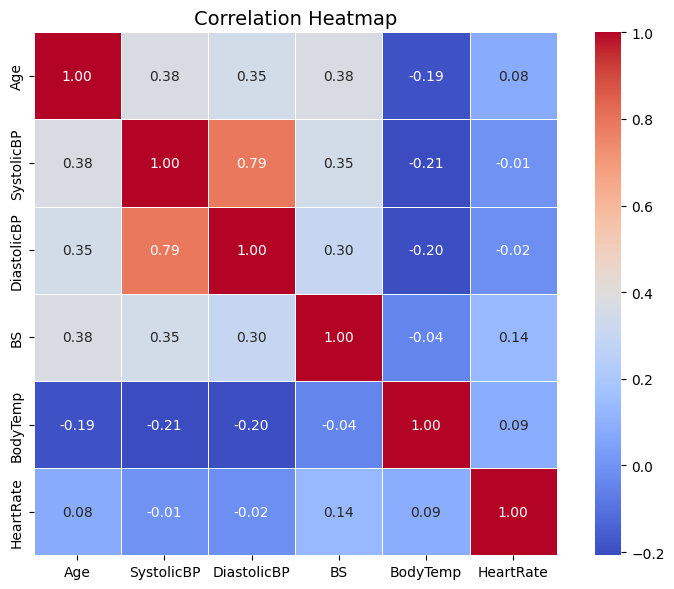

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot using seaborn for better visuals and annotation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


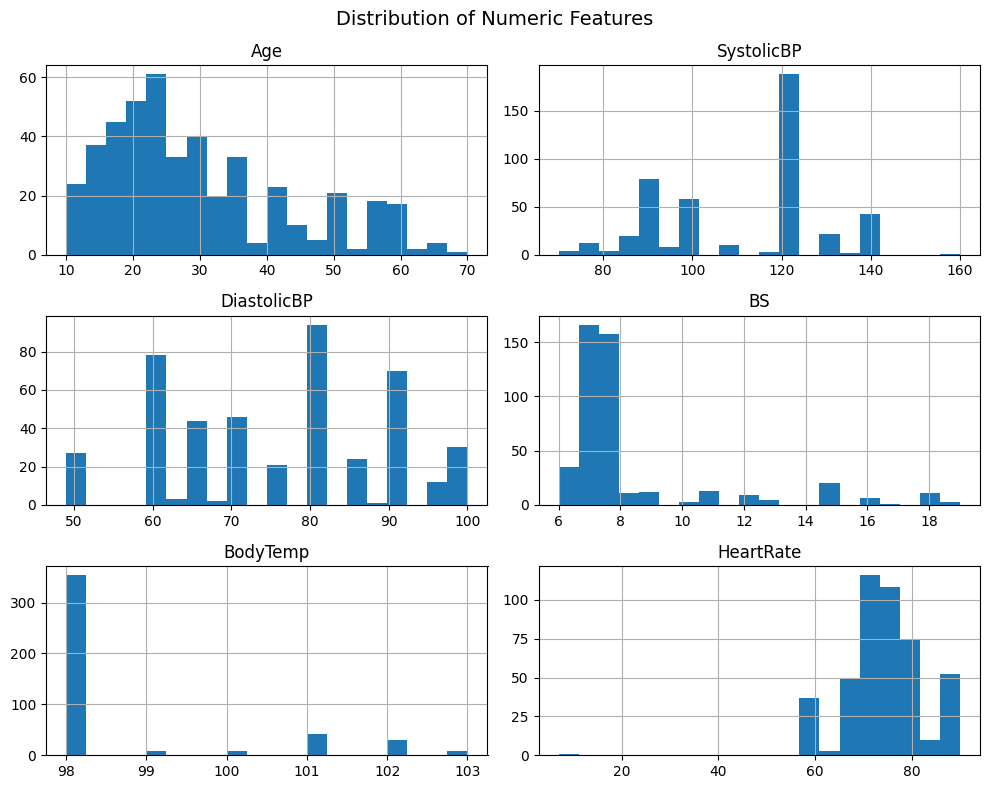

In [12]:
# Plot simple histograms for numeric columns
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


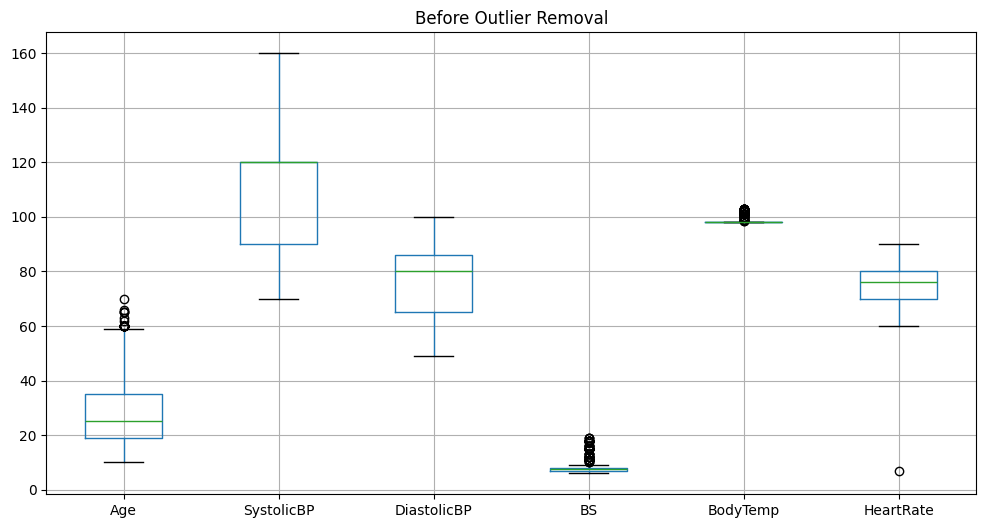

After outlier removal: (283, 7)


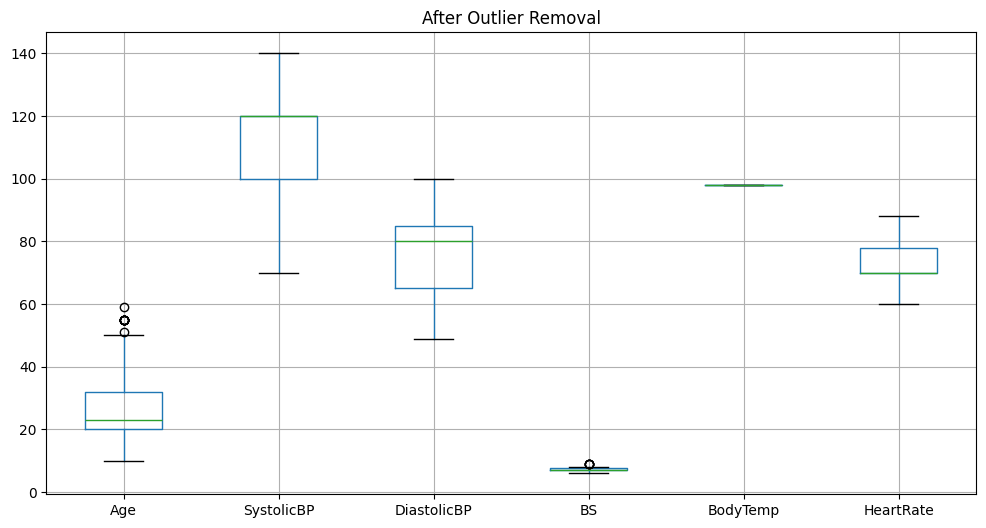

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for outlier analysis
numeric_cols = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

# --- Plot boxplots before removal ---
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Before Outlier Removal")
plt.show()

# --- Remove outliers using IQR method ---
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5×IQR range
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After outlier removal:", df.shape)

# --- Plot boxplots after removal ---
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("After Outlier Removal")
plt.show()


/tmp/ipython-input-1350298370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=df, palette="Set2")


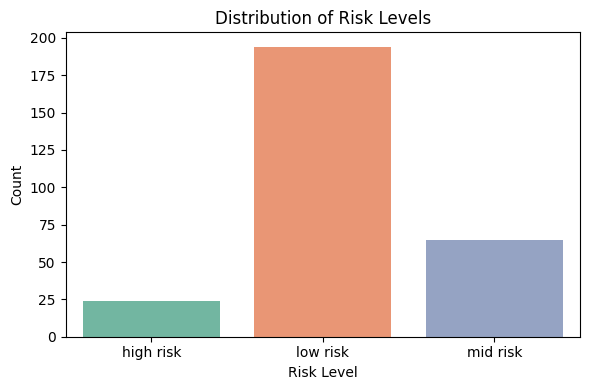

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
if "RiskLevel" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="RiskLevel", data=df, palette="Set2")
    plt.title("Distribution of Risk Levels")
    plt.xlabel("Risk Level")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("RiskLevel column not found in the dataset.")
